# CMU Data Science Club Sustainability Datathon

**Team Name:** andrewID of team member submitting (only 1 member submits for entire team)

**Names:** include member submitting: Yizhou Wang, Daniel Ji, Yutai Long, Aidan Zhang

**Andrew IDs:** include member submitting: yizhouw3, andrew id 2, andrew id 3, ...

**This notebook is only for reference to help your team download the data and get started. Using this notebook is not required.**

In [2]:
### Load Some Common Packages ###
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from modules import lin_reg
from modules import design

We provide two datasets, you may use one or both or none (we encourage you to find your own datasets either entirely or supplementarily!). Refer to the dataset schemas - the column description tables in the instructions packet - to understand what information is contained in the datasets. Additionally, we have provided some guiding questions but feel free to go beyond those.

In [39]:
### Load the data ###
df_1 = pd.read_csv("data/large_scale_ai_models_added_cols.csv")
df_1

,System,Domain,Task,Authors,Model accessibility,Link,Citations,Reference,Publication date,Organization,...,Finetune compute (FLOP),Finetune compute notes,Hardware quantity,Training code accessibility,Dataset accessibility,Accessibility notes,Organization categorization (from Organization),Training power (Watts),Training energy (kWh),Carbon Emissions from training (lb)
0,Firefly Video,Video,Video generation,Adobe,Hosted access (no API),https://news.adobe.com/news/2024/10/101424-ado...,NaN,Adobe Launches Firefly Video Model and Enhance...,2024-10-14,Adobe,...,NaN,NaN,NaN,NaN,NaN,NaN,Industry,3.300000e+14,NaN,NaN
1,Meta Movie Gen Video,Video,Video generation,"Adam Polyak, Amit Zohar, Andrew Brown, Andros ...",Unreleased,https://ai.meta.com/static-resource/movie-gen-...,NaN,Movie Gen: A Cast of Media Foundation Models,2024-10-04,Meta AI,...,NaN,NaN,6144.0,NaN,NaN,NaN,Industry,2.800000e+13,9.268000e+12,7.970480e+12
2,Meta Movie Gen Audio,Audio,Audio generation,"Adam Polyak, Amit Zohar, Andrew Brown, Andros ...",Unreleased,https://ai.meta.com/static-resource/movie-gen-...,NaN,Movie Gen: A Cast of Media Foundation Models,2024-10-04,Meta AI,...,NaN,NaN,384.0,NaN,NaN,NaN,Industry,3.470000e+13,1.248048e+13,1.073321e+13
3,Llama 3.2 3B,Language,"Language modelling/generation,Text summarizati...",NaN,Open weights (restricted use),https://ai.meta.com/blog/llama-3-2-connect-202...,NaN,Llama 3.2: Revolutionizing edge AI and vision ...,2024-09-24,Meta AI,...,NaN,NaN,NaN,Unreleased,NaN,LLAMA 3.2 COMMUNITY LICENSE AGREEMENT\n\nhttps...,Industry,1.600000e+15,NaN,NaN
4,Qwen2.5-72B,Language,Language modelling/generation,NaN,Open weights (unrestricted),https://qwenlm.github.io/blog/qwen2.5/,NaN,Qwen2.5: A Party of Foundation Models!,2024-09-19,Alibaba,...,NaN,NaN,NaN,Unreleased,Unreleased,license: allows commercial. weights only\nhttp...,Industry,1.210000e+14,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218,GShard (dense),Language,Translation,"Dmitry Lepikhin, HyoukJoong Lee, Yuanzhong Xu,...",Unreleased,https://arxiv.org/abs/2006.16668,829.0,GShard: Scaling Giant Models with Conditional ...,2020-06-30,Google,...,NaN,NaN,1024.0,Open source,NaN,"training code is open, Apache: https://github....",Industry,6.280000e+13,6.330240e+13,5.444006e+13
219,GPT-3 175B (davinci),Language,"Text autocompletion,Language modelling/generation","Tom B. Brown, Benjamin Mann, Nick Ryder, Melan...",API access,https://arxiv.org/abs/2005.14165,30858.0,Language Models are Few-Shot Learners,2020-05-28,OpenAI,...,NaN,NaN,10000.0,Unreleased,NaN,https://openai.com/blog/openai-api\n,Industry,2.240000e+13,7.956480e+12,6.842573e+12
220,Meena,Language,Text autocompletion,"Dongling Xiao, Han Zhang, Yukun Li, Yu Sun, Ha...",Unreleased,https://arxiv.org/abs/2001.09977,867.0,Towards a Human-like Open-Domain Chatbot,2020-01-28,Google Brain,...,NaN,NaN,1024.0,Unreleased,NaN,NaN,Industry,6.820000e+13,4.910400e+13,4.222944e+13
221,AlphaGo Zero,Games,Go,"D Silver, J Schrittwieser, K Simonyan, I Anton...",Unreleased,https://www.nature.com/articles/nature24270,8692.0,Mastering the game of Go without human knowledge,2017-10-18,DeepMind,...,NaN,NaN,NaN,Unreleased,NaN,NaN,Industry,4.000000e+13,1.920000e+13,1.651200e+13


In [87]:
df_2 = pd.read_csv("data/bloom_emissions.csv")
df_2.head()

,timestamp,project_name,run_id,duration,emissions,emissions_rate,cpu_power,gpu_power,ram_power,cpu_energy,...,python_version,cpu_count,cpu_model,gpu_count,gpu_model,longitude,latitude,ram_total_size,tracking_mode,on_cloud
0,2022-05-18T12:03:49,distilbert-base-uncased_random_wikitext_4,3d0c0253-711f-482e-b2fa-cf009acb467c,0.912916,0.000027,0.029840,0.0,418.779,70.345768,0.0,...,3.8.10,40.0,Intel(R) Xeon(R) Silver 4210 CPU @ 2.20GHz,8.0,8 x NVIDIA GeForce RTX 3090,-72.9302,41.3186,187.588715,machine,N
1,2022-05-18T12:03:49,distilbert-base-uncased_random_wikitext_4,3d0c0253-711f-482e-b2fa-cf009acb467c,1.000802,0.000029,0.029172,0.0,418.763,70.345768,0.0,...,3.8.10,40.0,Intel(R) Xeon(R) Silver 4210 CPU @ 2.20GHz,8.0,8 x NVIDIA GeForce RTX 3090,-72.9302,41.3186,187.588715,machine,N
2,2022-05-18T12:03:49,distilbert-base-uncased_random_wikitext_4,3d0c0253-711f-482e-b2fa-cf009acb467c,1.062332,0.000030,0.028206,0.0,421.098,70.345768,0.0,...,3.8.10,40.0,Intel(R) Xeon(R) Silver 4210 CPU @ 2.20GHz,8.0,8 x NVIDIA GeForce RTX 3090,-72.9302,41.3186,187.588715,machine,N
3,2022-05-18T12:03:49,distilbert-base-uncased_random_wikitext_4,3d0c0253-711f-482e-b2fa-cf009acb467c,1.110190,0.000031,0.027648,0.0,421.098,70.345768,0.0,...,3.8.10,40.0,Intel(R) Xeon(R) Silver 4210 CPU @ 2.20GHz,8.0,8 x NVIDIA GeForce RTX 3090,-72.9302,41.3186,187.588715,machine,N
4,2022-05-18T12:03:49,distilbert-base-uncased_random_wikitext_4,3d0c0253-711f-482e-b2fa-cf009acb467c,1.157329,0.000031,0.027152,0.0,425.624,70.345768,0.0,...,3.8.10,40.0,Intel(R) Xeon(R) Silver 4210 CPU @ 2.20GHz,8.0,8 x NVIDIA GeForce RTX 3090,-72.9302,41.3186,187.588715,machine,N


In [4]:
print(f"Columns of Dataset 1: {df_1.columns}")
print(f"Columns of Dataset 2: {df_2.columns}")

Columns of Dataset 1: Index(['System', 'Domain', 'Task', 'Authors', 'Model accessibility', 'Link',
       'Citations', 'Reference', 'Publication date', 'Organization',
       'Parameters', 'Parameters notes', 'Training compute (FLOP)',
       'Training compute notes', 'Training dataset', 'Training dataset notes',
       'Training dataset size (datapoints)', 'Dataset size notes',
       'Training time (hours)', 'Training hardware', 'Abstract',
       'Country (from Organization)', 'Base model', 'Finetune compute (FLOP)',
       'Finetune compute notes', 'Hardware quantity',
       'Training code accessibility', 'Dataset accessibility',
       'Accessibility notes',
       'Organization categorization (from Organization)',
       'Training power (Watts) ', 'Training energy (kWh) ',
       'Carbon Emissions from training (lb)'],
      dtype='object')
Columns of Dataset 2: Index(['timestamp', 'project_name', 'run_id', 'duration', 'emissions',
       'emissions_rate', 'cpu_power', 'gpu_powe

In [ ]:
### Dataset 1 ###

In [20]:
## clean ##

In [4]:
df_1.isnull().sum()

System                                               0
Domain                                               0
Task                                                 0
Authors                                             91
Model accessibility                                 39
Link                                                 3
Citations                                          147
Reference                                           38
Publication date                                     0
Organization                                         0
Parameters                                          64
Parameters notes                                    86
Training compute (FLOP)                             94
Training compute notes                              79
Training dataset                                   109
Training dataset notes                             104
Training dataset size (datapoints)                 103
Dataset size notes                                 107
Training t

In [40]:
df_1 = df_1[['Country (from Organization)', 'Parameters', 'Training power (Watts) ']]

In [41]:
df_1.dropna(subset=['Training power (Watts) '], axis=0, inplace=True)
df_1.reset_index(drop=True, inplace=True)
df_1

C:\Users\yizho\AppData\Local\Temp\ipykernel_22032\3099711072.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1.dropna(subset=['Training power (Watts) '], axis=0, inplace=True)


,Country (from Organization),Parameters,Training power (Watts)
0,United States of America,NaN,3.300000e+14
1,United States of America,3.000000e+10,2.800000e+13
2,United States of America,1.300000e+10,3.470000e+13
3,United States of America,3.210000e+09,1.600000e+15
4,China,7.270000e+10,1.210000e+14
...,...,...,...
125,United States of America,2.300000e+09,6.280000e+13
126,United States of America,1.750000e+11,2.240000e+13
127,United States of America,2.600000e+09,6.820000e+13
128,United Kingdom of Great Britain and Northern I...,4.640024e+07,4.000000e+13


In [42]:
df_1_clean = df_1.dropna(subset=['Parameters'], axis=0)
df_1_clean.reset_index(drop=True, inplace=True)
df_1_clean

,Country (from Organization),Parameters,Training power (Watts)
0,United States of America,3.000000e+10,2.800000e+13
1,United States of America,1.300000e+10,3.470000e+13
2,United States of America,3.210000e+09,1.600000e+15
3,China,7.270000e+10,1.210000e+14
4,China,7.200000e+10,5.020000e+13
...,...,...,...
95,Israel,1.780000e+11,2.740000e+13
96,United States of America,2.300000e+09,6.280000e+13
97,United States of America,1.750000e+11,2.240000e+13
98,United States of America,2.600000e+09,6.820000e+13


In [ ]:
#df_1_clean.to_csv("data/cleaned.csv", index=False)

In [75]:
df_1_clean = pd.read_csv("data/cleaned.csv")
df_1_clean

,Country (from Organization),Parameters,Training power (Watts)
0,USA,3.000000e+10,2.800000e+13
1,USA,1.300000e+10,3.470000e+13
2,USA,3.210000e+09,1.600000e+15
3,China,7.270000e+10,1.210000e+14
4,China,7.200000e+10,5.020000e+13
...,...,...,...
91,Israel,1.780000e+11,2.740000e+13
92,USA,2.300000e+09,6.280000e+13
93,USA,1.750000e+11,2.240000e+13
94,USA,2.600000e+09,6.820000e+13


In [76]:
by_country = df_1_clean.groupby('Country (from Organization)').mean()
by_country

,Parameters,Training power (Watts)
Country (from Organization),,
Canada,1.040000e+11,5.150000e+13
China,1.660355e+11,9.012138e+14
Germany,2.569885e+10,8.700000e+13
Hong Kong,4.366667e+10,1.180333e+14
Israel,1.780000e+11,2.740000e+13
Japan,1.050000e+10,8.650000e+14
Korea,1.754700e+11,8.168333e+13
Multinational,1.490875e+11,1.670000e+14
Russia,1.000000e+11,7.930000e+13


In [82]:
by_country["Power Consumption Normalized by Model Size"] = by_country["Training power (Watts) "]/by_country["Parameters"]
by_country

,Parameters,Training power (Watts),Power Consumption Normalized by Model Size
Country (from Organization),,,
Canada,1.040000e+11,5.150000e+13,495.192308
China,1.660355e+11,9.012138e+14,5427.837417
Germany,2.569885e+10,8.700000e+13,3385.365726
Hong Kong,4.366667e+10,1.180333e+14,2703.053435
Israel,1.780000e+11,2.740000e+13,153.932584
Japan,1.050000e+10,8.650000e+14,82380.952381
Korea,1.754700e+11,8.168333e+13,465.511673
Multinational,1.490875e+11,1.670000e+14,1120.147564
Russia,1.000000e+11,7.930000e+13,793.000000


In [85]:
#by_country.to_csv("results/set1/by_country.csv")

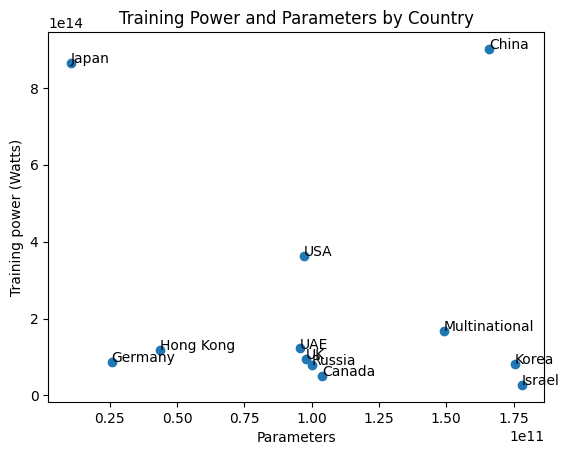

In [84]:
plt.scatter(by_country['Parameters'], by_country['Training power (Watts) '], label=by_country.index.tolist())
countries = by_country.index.tolist()
for i in range(by_country.shape[0]):
    plt.text(by_country.loc[countries[i], 'Parameters'], by_country.loc[countries[i], 'Training power (Watts) '],\
             countries[i], fontsize=10)
plt.xlabel("Parameters")
plt.ylabel("Training power (Watts)")
plt.title("Training Power and Parameters by Country")
#plt.savefig('results/set1/countries.png')

In [5]:
### Dataset 2 ###

In [6]:
## clean ##

In [88]:
df_2.drop(['timestamp','cpu_power', 'cpu_energy', 'cpu_count', 'gpu_count', \
           'cloud_provider', 'cloud_region', 'run_id', 'country_name', 'country_iso_code',\
          'region', 'os', 'python_version', 'cpu_model', 'gpu_model',\
          'longitude', 'latitude', 'ram_total_size', 'tracking_mode', 'on_cloud'], axis=1, inplace=True)
df_2 = df_2.dropna(axis=0).reset_index(drop=True)
df_2 = df_2[df_2['duration']>1000].dropna(axis=0).reset_index(drop=True)
df_2['emissions_rate'] = 1000*df_2['emissions_rate']

In [8]:
## EDA ##

In [89]:
df_2.describe()

,duration,emissions,emissions_rate,gpu_power,ram_power,gpu_energy,ram_energy,energy_consumed
count,2468.000000,2468.000000,2468.000000,2468.000000,2468.000000,2468.000000,2468.000000,2468.000000
mean,1704.513338,0.033836,19.853324,409.990271,70.345768,0.133670,0.015980,0.149649
std,80.279499,0.001504,0.073885,164.430824,0.000000,0.005669,0.001056,0.006652
min,1489.559832,0.029924,19.721722,268.614000,70.345768,0.118697,0.013650,0.132347
25%,1645.367633,0.032738,19.792068,275.347500,70.345768,0.129609,0.015184,0.144792
50%,1720.930908,0.034172,19.855745,283.236000,70.345768,0.134848,0.016122,0.151136
75%,1768.661477,0.035025,19.904588,614.815750,70.345768,0.138153,0.016664,0.154911
max,1832.277324,0.036339,20.089019,644.936000,70.345768,0.143815,0.018057,0.160722


In [10]:
df_2[1000:1010]

,project_name,duration,emissions,emissions_rate,gpu_power,ram_power,gpu_energy,ram_energy,energy_consumed
1000,distilgpt2_random_wikitext_4,1615.213983,0.032197,19.933462,288.865,70.345768,0.127689,0.014711,0.142400
1001,distilgpt2_random_wikitext_4,1615.326362,0.032199,19.933333,288.240,70.345768,0.127696,0.014713,0.142409
1002,distilgpt2_random_wikitext_4,1615.437757,0.032201,19.933207,288.206,70.345768,0.127704,0.014715,0.142418
1003,distilgpt2_random_wikitext_4,1615.549944,0.032203,19.933076,288.205,70.345768,0.127711,0.014716,0.142427
1004,distilgpt2_random_wikitext_4,1615.662547,0.032205,19.932940,288.071,70.345768,0.127718,0.014718,0.142436
1005,distilgpt2_random_wikitext_4,1615.777503,0.032207,19.932784,287.883,70.345768,0.127725,0.014720,0.142445
1006,distilgpt2_random_wikitext_4,1615.890944,0.032209,19.932633,286.241,70.345768,0.127732,0.014722,0.142454
1007,distilgpt2_random_wikitext_4,1616.003513,0.032211,19.932491,285.590,70.345768,0.127740,0.014723,0.142463
1008,distilgpt2_random_wikitext_4,1616.115402,0.032213,19.932352,287.232,70.345768,0.127747,0.014725,0.142472
1009,distilgpt2_random_wikitext_4,1616.227410,0.032215,19.932218,287.713,70.345768,0.127754,0.014727,0.142481


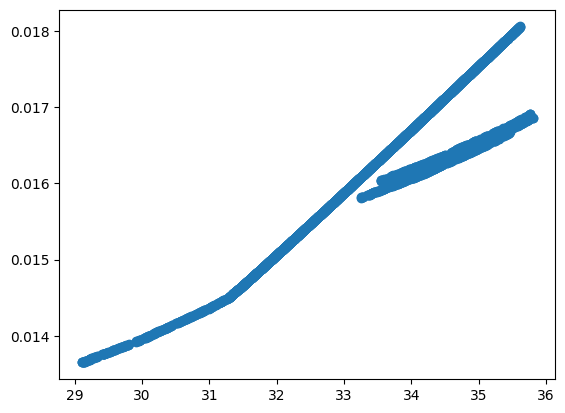

<Figure size 640x480 with 0 Axes>

In [11]:
plt.scatter(df_2['duration']*df_2['ram_power']/3600, df_2['ram_energy'])
plt.show()
plt.clf()

In [90]:
df_2.drop(['emissions', 'energy_consumed', 'gpu_energy', 'ram_energy'], axis=1, inplace=True)
df_2[1000:1010]

,project_name,duration,emissions_rate,gpu_power,ram_power
1000,distilgpt2_random_wikitext_4,1615.213983,19.933462,288.865,70.345768
1001,distilgpt2_random_wikitext_4,1615.326362,19.933333,288.240,70.345768
1002,distilgpt2_random_wikitext_4,1615.437757,19.933207,288.206,70.345768
1003,distilgpt2_random_wikitext_4,1615.549944,19.933076,288.205,70.345768
1004,distilgpt2_random_wikitext_4,1615.662547,19.932940,288.071,70.345768
1005,distilgpt2_random_wikitext_4,1615.777503,19.932784,287.883,70.345768
1006,distilgpt2_random_wikitext_4,1615.890944,19.932633,286.241,70.345768
1007,distilgpt2_random_wikitext_4,1616.003513,19.932491,285.590,70.345768
1008,distilgpt2_random_wikitext_4,1616.115402,19.932352,287.232,70.345768
1009,distilgpt2_random_wikitext_4,1616.227410,19.932218,287.713,70.345768


In [91]:
by_project_name = df_2.groupby('project_name').mean()
#by_project_name.to_csv('results/set2/by_project_name.csv')
by_project_name

,duration,emissions_rate,gpu_power,ram_power
project_name,,,,
distilbert-base-uncased_pretrained_wikitext_4,1767.101571,19.923243,617.431049,70.345768
distilbert-base-uncased_random_wikitext_4,1773.659714,19.836213,618.271887,70.345768
distilgpt2_pretrained_wikitext_4,1755.911376,19.843329,618.858714,70.345768
distilgpt2_random_wikitext_4,1683.379907,19.848617,337.085847,70.345768


In [14]:
## Fit Models ##

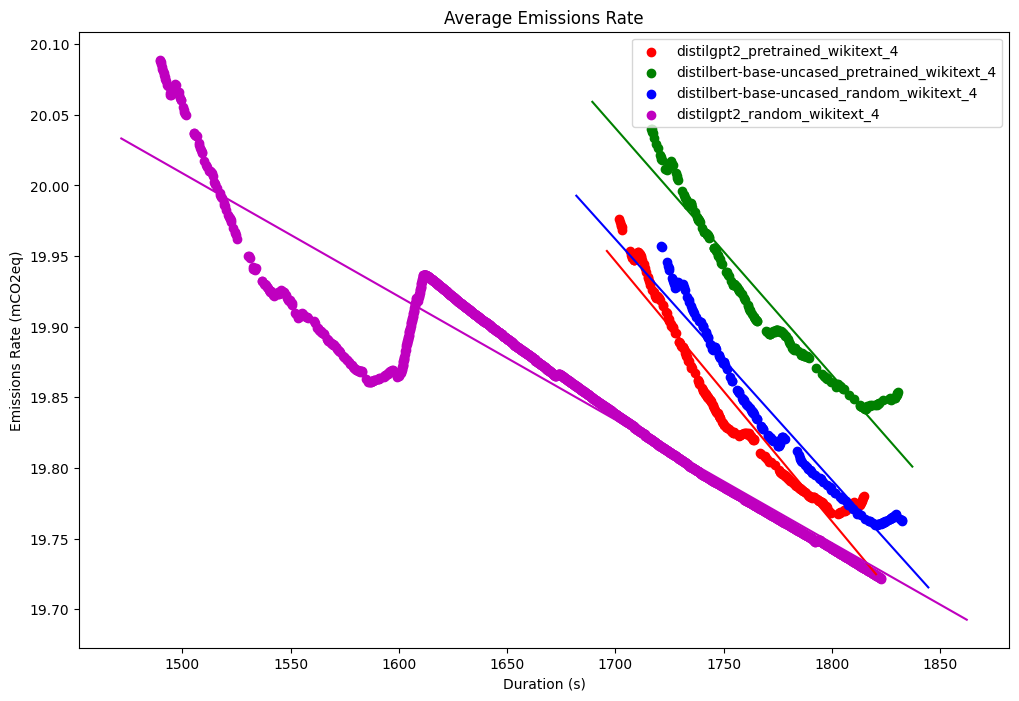

In [94]:
project_names = df_2['project_name'].unique()

models_summary = pd.DataFrame(index=project_names, columns=['R^2', 'slope'])

colors = ['r', 'g', 'b', 'm']
ax = plt.subplots(figsize=(12, 8))[1]
ax.set_xlabel("Duration (s)")
ax.set_ylabel("Emissions Rate (mCO2eq)")
ax.set_title('Average Emissions Rate')
for i in range(project_names.shape[0]):
    df_project = df_2[df_2['project_name']==project_names[i]].dropna().reset_index(drop=True)
    df_project = df_project.select_dtypes(include='float')
    model_project = lin_reg.fitOne(df_project, 'duration', 'emissions_rate')

    models_summary.loc[project_names[i], 'R^2'] = model_project.rsquared
    models_summary.loc[project_names[i], 'slope'] = model_project.params.iloc[1]
    
    ax.scatter(df_project['duration'], df_project['emissions_rate'], color=colors[i], label=project_names[i])
    lin_reg.abfitline(ax, model_project, color=colors[i])
ax.legend()

plt.savefig("results/set2/emissions_duration.png")
plt.show()


In [93]:
models_summary
#models_summary.to_csv('results/set2/models_summary.csv')

,R^2,slope
distilgpt2_pretrained_wikitext_4,0.927421,-0.001842
distilbert-base-uncased_pretrained_wikitext_4,0.934591,-0.001748
distilbert-base-uncased_random_wikitext_4,0.945209,-0.001706
distilgpt2_random_wikitext_4,0.912011,-0.000873
